In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

import numpy as np
from data_loader import load_mnist, load_fashion_mnist
import matplotlib.pyplot as plt

In [2]:
print("Loading data...")
# X_train, y_train, X_test, y_test = load_mnist()
X_train, y_train, X_test, y_test = load_fashion_mnist()
print("Fashion-MNIST Data Loaded.")

Loading data...
Fashion-MNIST Data Loaded.


Training Data Shape: (60000, 784)
Test Data Shape: (10000, 784)
Data Type: float32
Min Value: 0.0
Max Value: 1.0

Visualising 5 Random Digits:


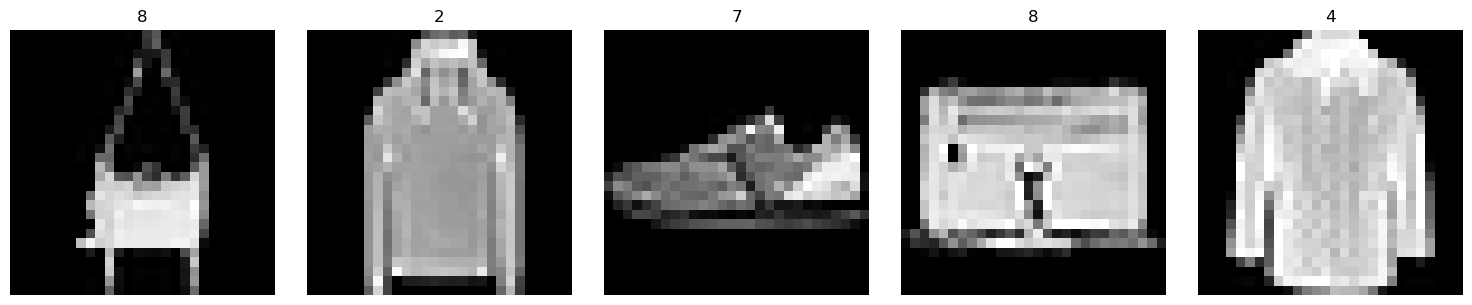

In [3]:
# Check Shapes and Types
print(f"Training Data Shape: {X_train.shape}")  # Should be (60000, 784)
print(f"Test Data Shape: {X_test.shape}")       # Should be (10000, 784)
print(f"Data Type: {X_train.dtype}")            # Should be float32
print(f"Min Value: {X_train.min()}")            # Should be 0.0
print(f"Max Value: {X_train.max()}")            # Should be 1.0

# We need to reshape the flat (784,) vectors back to (28, 28) images to plot
print("\nVisualising 5 Random Digits:")

indices = np.random.randint(0, len(X_train), 5)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in zip(indices, axes):
    image = X_train[i].reshape(28, 28)
    label = y_train[i]
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f"{label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
from gan import GAN

BATCH_SIZE = 128
EPOCHS = 15
LATENT_VECTOR_DIM = 100
OUTPUT_DIM = 28*28
LEARNING_RATE = 0.001

gan = GAN(latent_vector_dim=LATENT_VECTOR_DIM, output_dim=OUTPUT_DIM, lr=LEARNING_RATE)

print(f"Starting training for {EPOCHS} epochs...\n")

for epoch in range(EPOCHS):
        epoch_loss = 0

        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]

        # Mini-batch Gradient Descent
        for i in range(0, X_train.shape[0], BATCH_SIZE):
            # Get batch
            X_batch = X_train_shuffled[i : i + BATCH_SIZE]

            """ Update Discriminator """
            gan.reset_gradients()
            
            # Get the predictions on real images
            real_predictions = gan.disc_forward(X_batch)
            gan.disc_backward(y_target=1)

            # Get the prediction on fake images
            z_noise = np.random.randn(BATCH_SIZE, LATENT_VECTOR_DIM) # Generate random noise
            fake_images = gan.gen_forward(z_noise) # Generate the fake images
            
            fake_predictions = gan.disc_forward(fake_images)
            gan.disc_backward(y_target=0)

            gan.discriminator_GD_update_step()


            """ Update Generator """
            gan.reset_gradients()

            new_z_noise = np.random.randn(BATCH_SIZE, LATENT_VECTOR_DIM) # Generate NEW batch of random noise
            new_fake_images = gan.gen_forward(new_z_noise) # Generate the NEW fake images

            new_fake_predictions = gan.disc_forward(new_fake_images)

            grad_at_disc_start = gan.disc_backward(y_target=1)
            gan.gen_backward(grad_at_disc_start)
            
            gan.generator_GD_update_step()

        print(f"Epoch {epoch+1}: D(Real): {np.mean(real_predictions):.4f} D(Fake): {np.mean(fake_predictions):.4f}")

Starting training for 15 epochs...

Epoch 1: D(Real): 0.7350 D(Fake): 0.3827
Epoch 2: D(Real): 0.8231 D(Fake): 0.1931
Epoch 3: D(Real): 0.6900 D(Fake): 0.2459
Epoch 4: D(Real): 0.6626 D(Fake): 0.2208
Epoch 5: D(Real): 0.7153 D(Fake): 0.2860
Epoch 6: D(Real): 0.7396 D(Fake): 0.2852
Epoch 7: D(Real): 0.7484 D(Fake): 0.2685
Epoch 8: D(Real): 0.7039 D(Fake): 0.3009
Epoch 9: D(Real): 0.6889 D(Fake): 0.2782
Epoch 10: D(Real): 0.6622 D(Fake): 0.3001
Epoch 11: D(Real): 0.6665 D(Fake): 0.3013
Epoch 12: D(Real): 0.7563 D(Fake): 0.3551
Epoch 13: D(Real): 0.7655 D(Fake): 0.2545
Epoch 14: D(Real): 0.6344 D(Fake): 0.2679
Epoch 15: D(Real): 0.6808 D(Fake): 0.2674


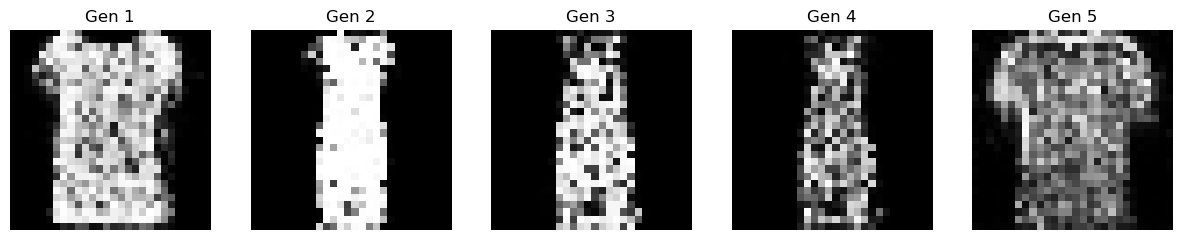

In [5]:
gan.infer(num_samples=5)

In [7]:
gan.save_model("../../models/gan/fashion_mnist_standard_training.joblib")

GAN model successfully saved to ../../models/gan/fashion_mnist_standard_training.joblib
